## Netflix Content Analysis 🎬

### Importing the required libaries with the dataset of netflix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All the required lib are imported")

All the required lib are imported


In [2]:
df = pd.read_csv("/kaggle/input/netflix-csv/netflix_titles.csv") #importing the DataFrame
# pd.reset_option("display.max_row",None)
# pd.set_option("display.max_columns",None)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [3]:
df.info() #checking the structure of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Interpretation of the above cell
- Date column is in object(string) Dtype, need to be in datetime object
- missing values in director, cast, country, date_added, rating column

In [4]:
df.isnull().sum() #checking for the missing values in dataframe

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

## We can see the here the missing data from each column
- Necessary actions will be taken place regarding the missing data

In [5]:
print("Director Column data:")
df['director'].head(5).reset_index()


Director Column data:


,index,director
0,0,NaN
1,1,Jorge Michel Grau
2,2,Gilbert Chan
3,3,Shane Acker
4,4,Robert Luketic


In [6]:
print("Missing data Director :")
df['director'].isnull().value_counts().reset_index()

Missing data Director :


,director,count
0,False,5398
1,True,2389


In [7]:
print("Cast Column data:")
df['cast'].head(5).reset_index()


Cast Column data:


,index,cast
0,0,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,1,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,2,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,3,"Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,4,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."


In [8]:
print("Missing data Cast :")
df['cast'].isnull().value_counts().reset_index()

Missing data Cast :


,cast,count
0,False,7069
1,True,718


In [9]:
print("Country Column data:")
df['country'].head(5).reset_index()

Country Column data:


,index,country
0,0,Brazil
1,1,Mexico
2,2,Singapore
3,3,United States
4,4,United States


In [10]:
print("Missing data country :")
df['country'].isnull().value_counts().reset_index()

Missing data country :


,country,count
0,False,7280
1,True,507


In [11]:
print("Date Column data:")
df['date_added'].head(5).reset_index()

Date Column data:


,index,date_added
0,0,"August 14, 2020"
1,1,"December 23, 2016"
2,2,"December 20, 2018"
3,3,"November 16, 2017"
4,4,"January 1, 2020"


In [12]:
print("Missing data in Date:")
df['date_added'].isnull().value_counts().reset_index()

Missing data in Date:


,date_added,count
0,False,7777
1,True,10


In [13]:
print("Rating Column data:")
df['rating'].head(5).reset_index()

Rating Column data:


,index,rating
0,0,TV-MA
1,1,TV-MA
2,2,R
3,3,PG-13
4,4,PG-13


In [14]:
print("Missing data in rating:")
df['rating'].isnull().value_counts().reset_index()


Missing data in rating:


,rating,count
0,False,7780
1,True,7


## Cleaning and Transforming the data
- cast and director nan values will be changed to empty
- changing the Dtype of date to datetime
- mode the country, most frequent one
- droping few rows from rating and date as there is very little data is missing

### Changing the Director NaN values

In [15]:
df['director'] = df['director'].fillna("Unknown")
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [16]:
df["director"].str.contains("Unknown").value_counts().reset_index()

,director,count
0,False,5398
1,True,2389


### Changing the Cast NaN values

In [17]:
df['cast'] = df['cast'].fillna("Unknown")
df.loc[df['cast'] == 'Unknown','cast'].value_counts().reset_index()

,cast,count
0,Unknown,718


In [18]:
df.isna().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

## Filling out the missing country data
- using mode for the most frequent country and changing it 

In [19]:
df["country"].isnull().value_counts().reset_index().rename({0: 'Missing country',1:"country not missing"})

,country,count
Missing country,False,7280
country not missing,True,507


In [20]:
df['country'].value_counts().reset_index()

,country,count
0,United States,2555
1,India,923
2,United Kingdom,397
3,Japan,226
4,South Korea,183
...,...,...
676,"Germany, United States, United Kingdom, Canada",1
677,"Peru, United States, United Kingdom",1
678,"Saudi Arabia, United Arab Emirates",1
679,"United Kingdom, France, United States, Belgium",1


In [21]:
most_frequent_country = df['country'].mode()[0]
print(most_frequent_country)

United States


In [22]:
df['country'] = df['country'].fillna(most_frequent_country)

In [23]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

## Handeling the missing values in date and rating column
- due to small missing values, droping those rows

In [24]:
df.dropna(subset=['date_added','rating'], inplace=True)

In [25]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Changing the Date dtype to datetime format

In [26]:
df['date_added'] = pd.to_datetime(df['date_added'],format="mixed",dayfirst=True)
df["date_added"]

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7770, dtype: datetime64[ns]

## creating 2 new feature column year and month 

In [27]:
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

In [28]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


# Distribution of content types

In [29]:
type_count = df['type'].value_counts()
print(type_count)

type
Movie      5372
TV Show    2398
Name: count, dtype: int64


In [30]:
color = [
    "#F4E8FF",  # powder lavender
    "#E6D8FF",  # soft lilac
    "#D6C7FF",  # pastel violet
    "#C6B5FF",  # light periwinkle
    "#B5A3FF",  # muted purple-blue
    "#A391FF"   # gentle indigo
]


Text(0.5, 1.0, 'Types of Content Distribution')

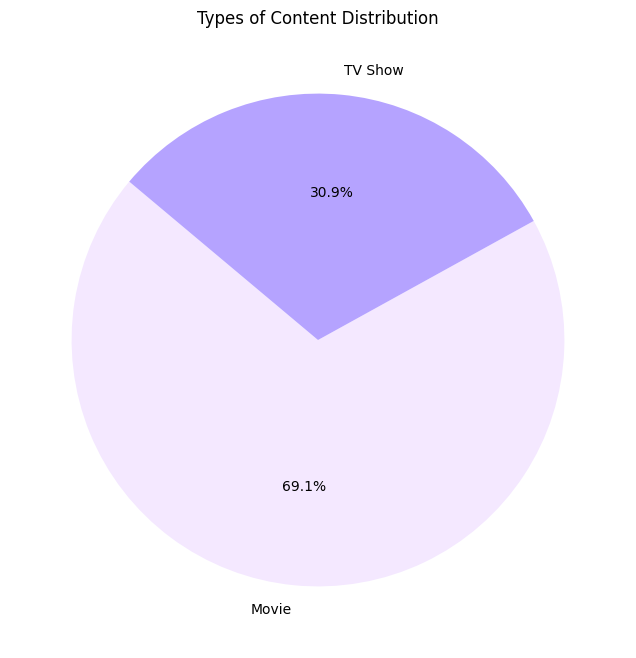

In [31]:
plt.figure(figsize=(10,8))
plt.pie(type_count,labels=type_count.index,startangle=140, colors=[color[0],color[4]],autopct='%1.1f%%')
plt.title("Types of Content Distribution")

### Insights - the netflix libary consist of more movies than tv shows

## How content is been added over time in netflix
- year distribution (type)
- month distribution (type)

In [32]:
content_year = df.groupby(['year','type']).size().unstack().fillna(0)
print(content_year)

type   Movie  TV Show
year                 
2008     1.0      1.0
2009     2.0      0.0
2010     1.0      0.0
2011    13.0      0.0
2012     3.0      0.0
2013     6.0      5.0
2014    19.0      6.0
2015    58.0     30.0
2016   256.0    184.0
2017   861.0    361.0
2018  1255.0    429.0
2019  1497.0    656.0
2020  1312.0    697.0
2021    88.0     29.0


In [33]:
content_month = df.groupby(['month','type']).size().unstack().fillna(0)
print(content_month)

type   Movie  TV Show
month                
1        559      197
2        328      143
3        470      198
4        419      181
5        371      172
6        377      165
7        403      197
8        413      204
9        414      204
10       553      232
11       511      227
12       554      278


Text(0.5, 1.0, 'Content Distribution as per Month')

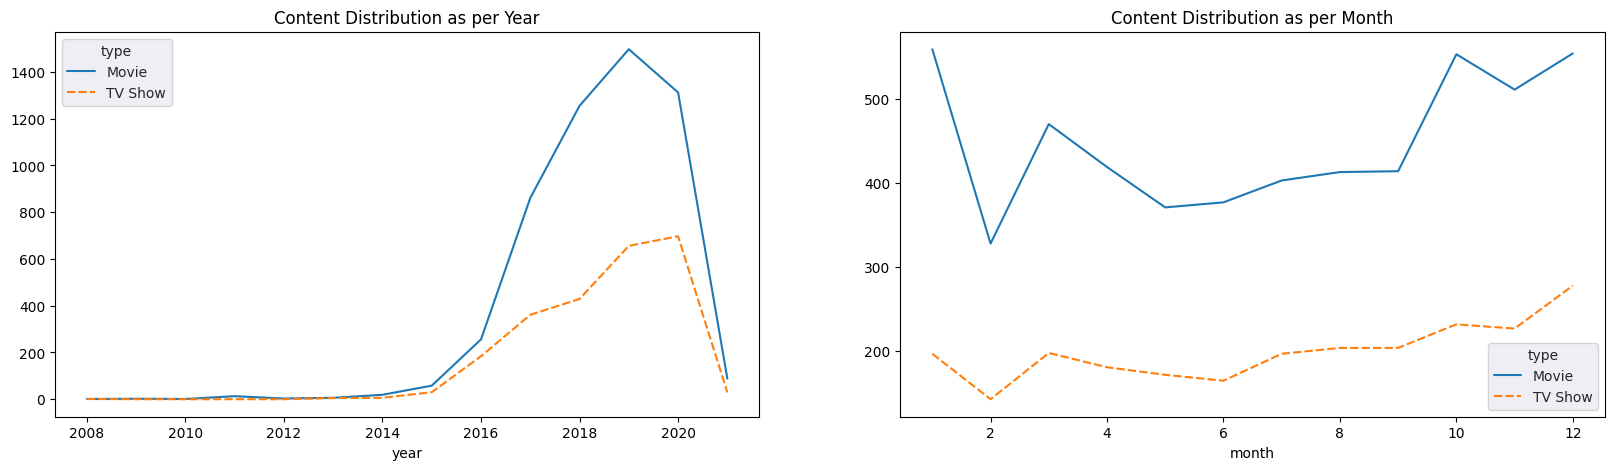

In [34]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
sns.set_style('darkgrid')

sns.lineplot(ax=axes[0],data=content_year).set_title("Content Distribution as per Year")
sns.lineplot(ax=axes[1],data=content_month).set_title("Content Distribution as per Month")

### Most popular Generns
- handeling multi value text column

In [35]:
df['listed_in'].reset_index()

,index,listed_in
0,0,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,1,"Dramas, International Movies"
2,2,"Horror Movies, International Movies"
3,3,"Action & Adventure, Independent Movies, Sci-Fi..."
4,4,Dramas
...,...,...
7765,7782,"Dramas, International Movies"
7766,7783,"Dramas, International Movies, Music & Musicals"
7767,7784,"Documentaries, International Movies, Music & M..."
7768,7785,"International TV Shows, Reality TV"


In [36]:
#creating a new gerne column for better view

df['gerne'] = df['listed_in'].str.split(", ")
df['gerne'] = df['gerne'].explode('gerne')

In [37]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,gerne
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,TV Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,TV Sci-Fi & Fantasy
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,Dramas
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,International Movies


In [106]:
gerne_data.isnull().sum()

gerne    0
count    0
dtype: int64

## Getting the top 15 gernes

In [38]:
gerne_data = df['gerne'].value_counts().reset_index()

print(gerne_data)

                           gerne  count
0           International Movies   1142
1                         Dramas    946
2                       Comedies    660
3         International TV Shows    546
4                  Documentaries    356
5             Action & Adventure    334
6                      TV Dramas    313
7             Independent Movies    289
8       Children & Family Movies    249
9                Romantic Movies    244
10                   TV Comedies    232
11                     Thrillers    231
12                Crime TV Shows    200
13               Stand-Up Comedy    197
14                    Docuseries    169
15                      Kids' TV    155
16              Music & Musicals    149
17                 Horror Movies    138
18             Romantic TV Shows    138
19              Sci-Fi & Fantasy    110
20              British TV Shows    104
21                    Reality TV     96
22                 Sports Movies     94
23                  Anime Series     82


In [39]:
gerne_data.head(10)

,gerne,count
0,International Movies,1142
1,Dramas,946
2,Comedies,660
3,International TV Shows,546
4,Documentaries,356
5,Action & Adventure,334
6,TV Dramas,313
7,Independent Movies,289
8,Children & Family Movies,249
9,Romantic Movies,244


<Axes: xlabel='count', ylabel='gerne'>

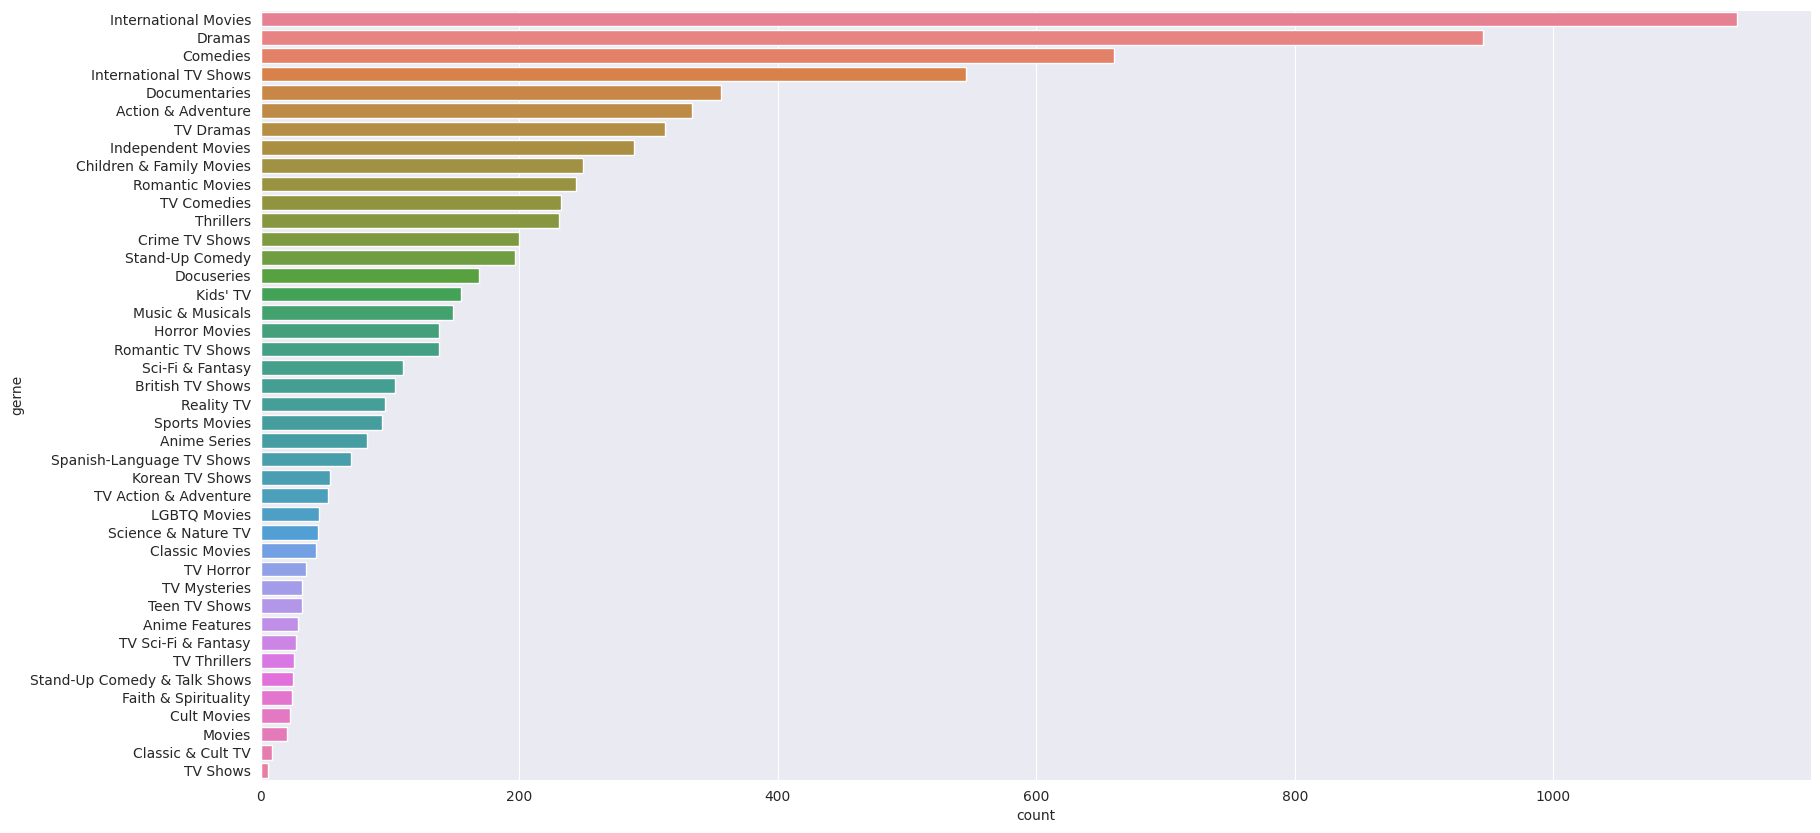

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(data=gerne_data, y='gerne', x='count', hue='gerne')

## Insight
- Internation Movies are the main stream movies in netflix

### Distribution of content Duration
 - seasons
 - number of minutes

In [41]:
# making new df movies 

movies_df =df[df['type'] == 'Movie'].copy()

In [42]:
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,gerne
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,TV Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,TV Sci-Fi & Fantasy
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,Dramas
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,International Movies
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6,International Movies


In [44]:
movies_df['duration'] = movies_df['duration'].str.replace("min", " ").astype(int)

In [58]:
movies_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,gerne
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,TV Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,TV Sci-Fi & Fantasy


In [49]:
#making tv series dataframe
tv_df =df[df['type'] == "TV Show"].copy()

In [50]:
tv_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,gerne
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,Horror Movies


In [57]:
tv_df["duration"] = tv_df['duration'].str.replace("Seasons"," ").str.replace("Season"," ").astype(int)
tv_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,gerne
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,Horror Movies


Text(0.5, 1.0, 'Duaration as per Seasons')

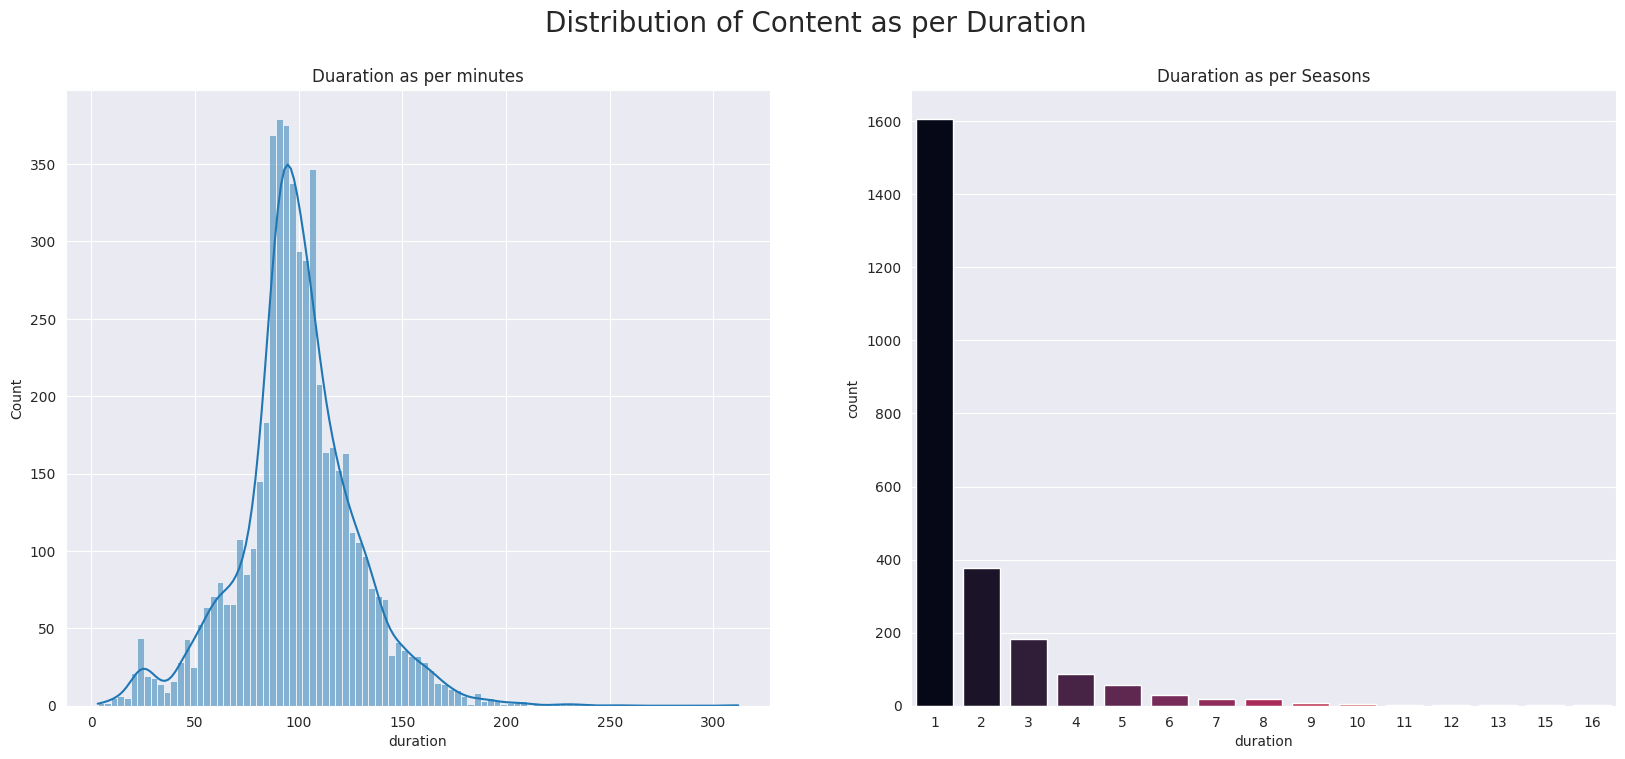

In [84]:
fig, axes = plt.subplots(1,2,figsize=(20,8))

plt.suptitle("Distribution of Content as per Duration",fontsize=20)

sns.histplot(ax=axes[0], data=movies_df, x="duration",kde=True).set_title("Duaration as per minutes")

sns.countplot(ax=axes[1], data=tv_df, x="duration",hue="duration",palette="rocket",legend=False).set_title("Duaration as per Seasons")


## Insight
- In movies the duration ranges from 50 to 150 minitues
- In tv shows max number of season are only 1season

## Geographical Analysis as the region

In [88]:
movies_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,gerne
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,TV Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,TV Sci-Fi & Fantasy


In [91]:
movies_df.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,gerne
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,Action & Adventure
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,Sci-Fi & Fantasy


In [95]:
movies_df['countries'] = movies_df['country'].str.split(", ")
movies_df.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,gerne,countries
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,Action & Adventure,[United States]
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,Sci-Fi & Fantasy,"[United Kingdom, Canada, United States]"


In [97]:
#exploding the values

movies_df['countries'] = movies_df['countries'].explode("countries")

In [105]:
movies_df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
year              0
month             0
gerne             0
countries       640
dtype: int64

In [112]:
movies_df['countries'].notna().value_counts()

countries
True     4732
False     640
Name: count, dtype: int64

In [115]:
#modeing the values to covering up the nan values
mode_country = movies_df['countries'].mode()[0]
print(mode_country)

United States


In [120]:
movies_df['countries'] = movies_df['countries'].fillna(mode_country)
#checking for the output 
movies_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year            0
month           0
gerne           0
countries       0
dtype: int64

In [133]:
mov_con_dataset = movies_df['countries'].value_counts().reset_index().head(10)
print(mov_con_dataset)

        countries  count
0   United States   2523
1           India    643
2  United Kingdom    295
3          Canada    197
4          France    180
5         Germany    104
6           Spain    100
7           Japan     73
8           China     72
9       Hong Kong     69


Text(0.5, 1.0, 'Movies Distribution as per Countries')

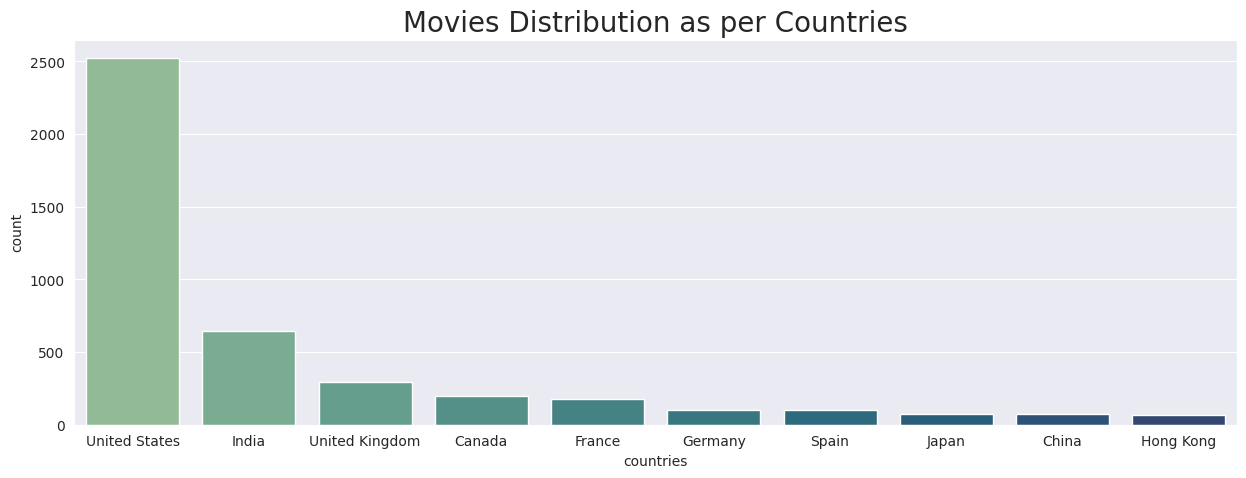

In [139]:
plt.figure(figsize=(15,5))
sns.barplot(data=mov_con_dataset, x="countries", y="count", hue="countries", legend=False, palette = "crest").set_title("Movies Distribution as per Countries",fontsize=20)